In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Downloads/heart-disease (1).csv')

## Problem statement

>Given clinical parameters about a patient,can we predict whether or not they have a heart disease

the original data came from UCI ML repository

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score


In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.shape

(303, 14)

In [9]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

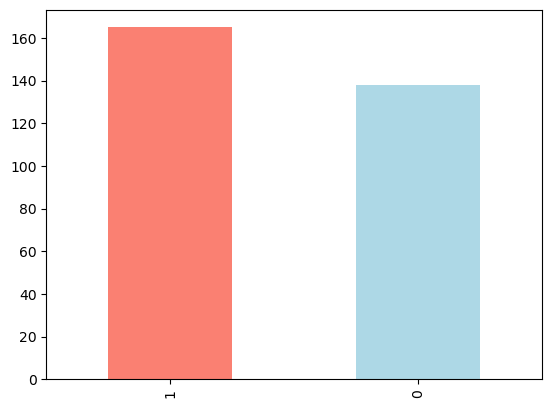

In [11]:
data['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to sex 

In [15]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
pd.crosstab(data['target'],data['sex'])

sex,0,1
target,,
0,24,114
1,72,93


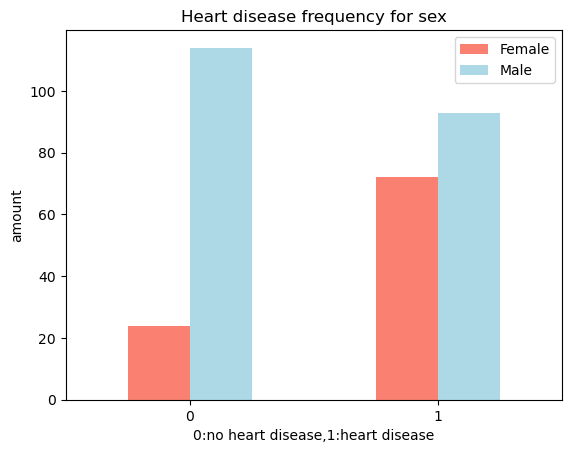

In [17]:
pd.crosstab(data['target'],data['sex']).plot(kind='bar',color=['salmon','lightblue'])
plt.title('Heart disease frequency for sex')
plt.xlabel('0:no heart disease,1:heart disease')
plt.ylabel('amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

## age vs max heart rate

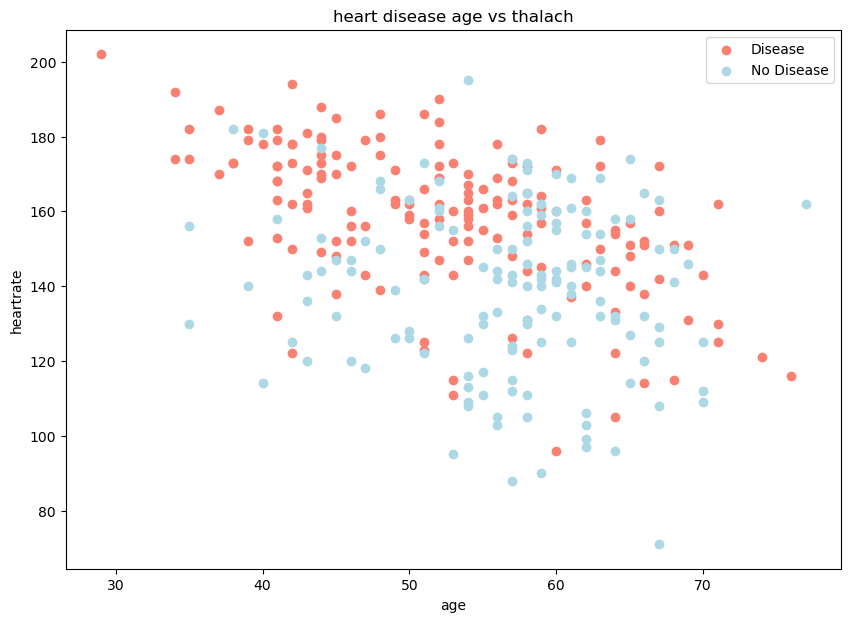

In [18]:
plt.figure(figsize=(10,7))

plt.scatter(data['age'][data['target']==1],data['thalach'][data['target']==1],c='salmon');
plt.scatter(data['age'][data['target']==0],data['thalach'][data['target']==0],c='lightblue')

plt.title('heart disease age vs thalach')
plt.xlabel('age')
plt.ylabel('heartrate')
plt.legend(['Disease','No Disease']);

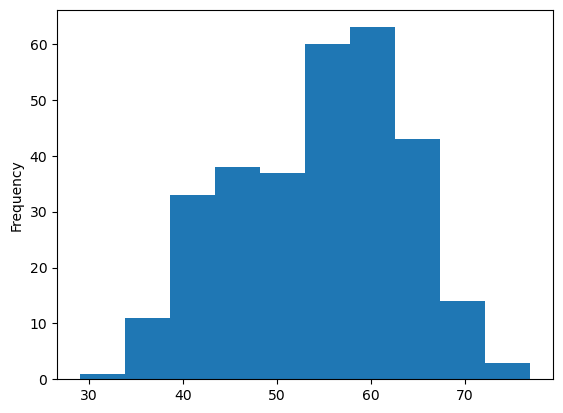

In [19]:
data['age'].plot(kind='hist');

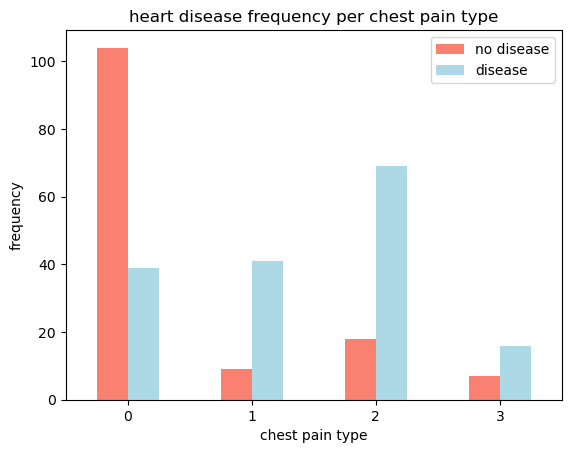

In [20]:
pd.crosstab(data['cp'],data['target']).plot(kind='bar',color=['salmon','lightblue'])
plt.title('heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('frequency')
plt.legend(['no disease','disease'])
plt.xticks(rotation=0);

In [21]:
#make a correlation matrix

data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


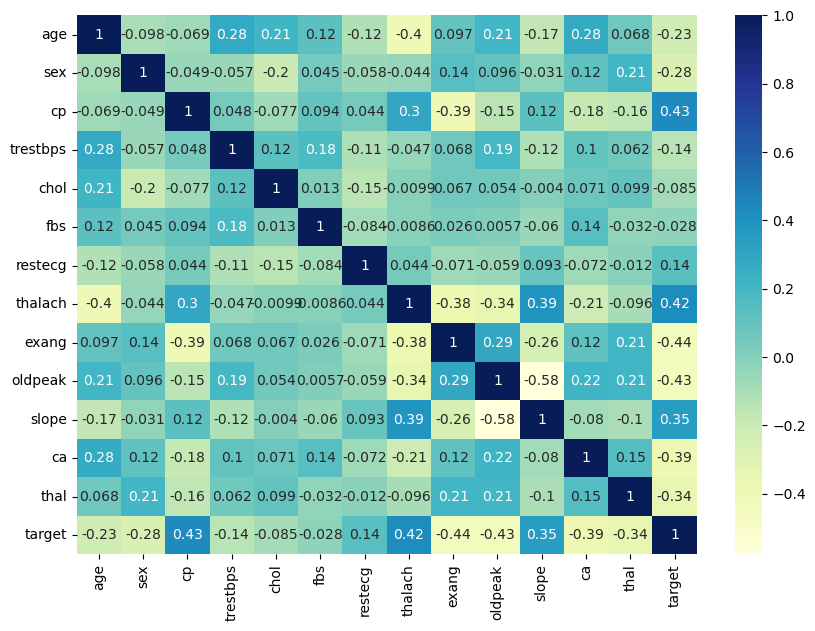

In [22]:
fig,ax=plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu');

### modelling

In [23]:
X=data.drop('target',axis=1)
y=data['target']

np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

len(x_train),len(x_test),len(y_train),len(y_test)

(242, 61, 242, 61)

In [24]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
#create a dictionary of models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


models={'Random Forest':RandomForestClassifier(),
             'Knn':KNeighborsClassifier(),
             'LogisticRegression':LogisticRegression()}




In [26]:
def fit_and_score(x_train,y_train,x_test,y_test,models):
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores
        
    
   

In [27]:
model_scores=fit_and_score(x_train,y_train,x_test,y_test,models)

C:\Users\udayk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
model_scores

{'Random Forest': 0.8524590163934426,
 'Knn': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442}

In [29]:
mod_acc=pd.DataFrame(model_scores,index=['accuracy'])

In [30]:
mod_acc

,Random Forest,Knn,LogisticRegression
accuracy,0.852459,0.688525,0.885246


<Axes: >

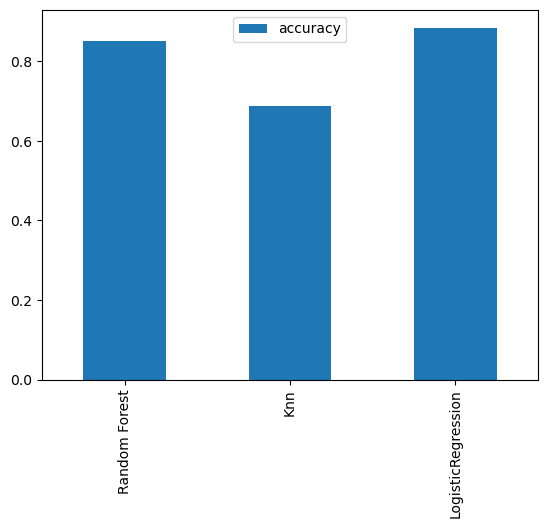

In [31]:
mod_acc.T.plot(kind='bar')

In [34]:
#tune knn model

train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))

    test_scores.append(knn.score(x_test,y_test))
    

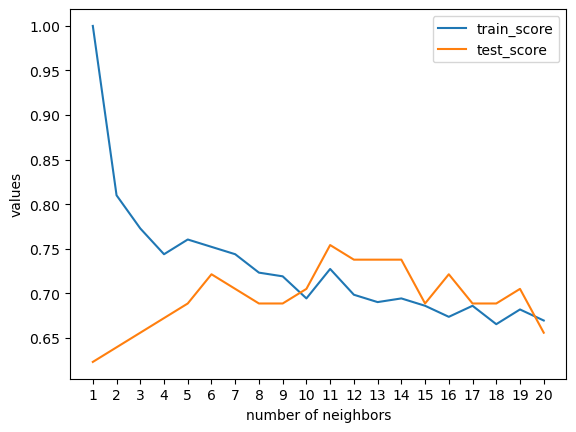

In [42]:
plt.plot(neighbors,train_scores,label='train_score')
plt.plot(neighbors,test_scores,label='test_score')
plt.xticks(range(1,21))
plt.xlabel('number of neighbors')
plt.ylabel('values')
plt.legend();

In [43]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [55]:
#create a hyperparameter grid for logistic egression and random forest classifier

log_reg_grid={'C':np.logspace(-4,4,20),
             'solver':['liblinear']}

rf_grid={'n_estimators':np.arange(10,1000,20),
        'max_depth':[None,3,5,10],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2)}

In [56]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=5)

In [57]:
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.633 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.604 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, solver=liblinear;, score=0.673 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, solver=liblinear;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, solver=liblinear;, score=0.735 total time=   0.0s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=5)

In [58]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [59]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [60]:
#setup random seed

np.random.seed(42)

rf_cv=RandomizedSearchCV(RandomForestClassifier(),
                        cv=5,
                        n_iter=20,
                        param_distributions=rf_grid,
                        verbose=True)

In [61]:
rf_cv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510,
       530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770,
       790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990])},
                   verbose=True)

In [62]:
rf_cv.best_params_

{'n_estimators': 30,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [63]:
rf_cv.score(x_test,y_test)

0.8688524590163934

In [64]:
#different hyperparameters for logistic regression

log_reg_grid={'C':np.logspace(-4,4,30),
             'solver':['liblinear']}

grid_log_model=GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                            cv=5,                           
                           verbose=True)

In [65]:
grid_log_model.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [66]:
grid_log_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [67]:
grid_log_model.score(x_test,y_test)

0.8852459016393442

In [68]:
#make predictions with tuned model

preds=grid_log_model.predict(x_test)

In [69]:
preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

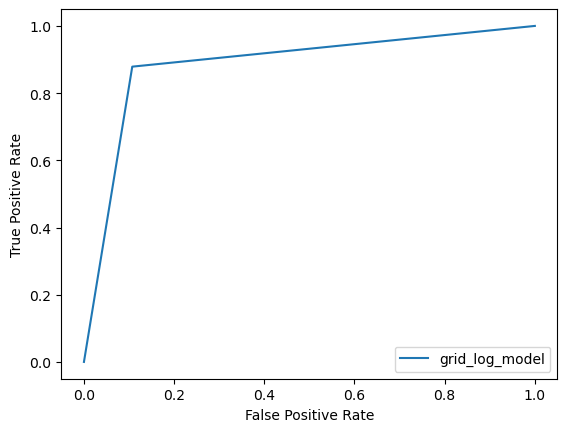

In [80]:
#evaluating model

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


fpr,tpr,thresholds=roc_curve(preds,y_test)

display=RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name='grid_log_model')

display.plot()

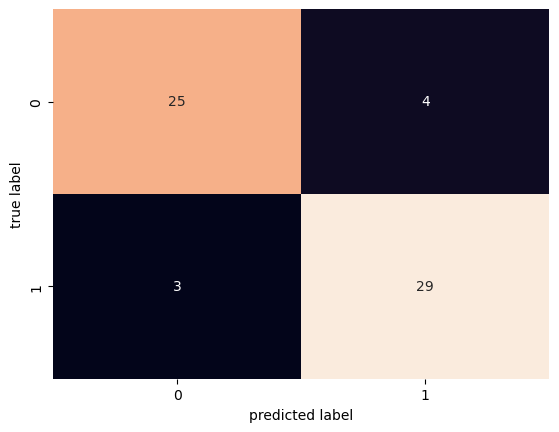

In [88]:
#confusion matrix

sns.heatmap(confusion_matrix(y_test,preds),annot=True,cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label');

In [91]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [98]:
#evaluate using cross validation
grid_log_model.best_params_

#create a new clf with best parameters
clf=LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')

In [99]:
clf

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [104]:
#cross validated accuracy
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(clf,X,y,scoring='accuracy',cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [105]:
np.mean(cv_acc)

0.8446994535519124

In [107]:
#cross validated accuracy
from sklearn.model_selection import cross_val_score

cv_prec=cross_val_score(clf,X,y,scoring='precision',cv=5)
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [108]:
np.mean(cv_prec)

0.8207936507936507

In [109]:
#cross validated accuracy
from sklearn.model_selection import cross_val_score

cv_recall=cross_val_score(clf,X,y,scoring='recall',cv=5)
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [110]:
np.mean(cv_recall)

0.9212121212121213

In [111]:
#cross validated accuracy
from sklearn.model_selection import cross_val_score

cv_f1=cross_val_score(clf,X,y,scoring='f1',cv=5)
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [112]:
np.mean(cv_f1)

0.8673007976269721

In [116]:
cv_metrics={'accuracy':np.mean(cv_acc),
                        'precision':np.mean(cv_prec),
                        'recall':np.mean(cv_recall),
                        'f1':np.mean(cv_f1)}

In [119]:
metrics=pd.DataFrame(cv_metrics,index=['value'])
metrics

,accuracy,precision,recall,f1
value,0.820794,0.820794,0.921212,0.867301


<Axes: >

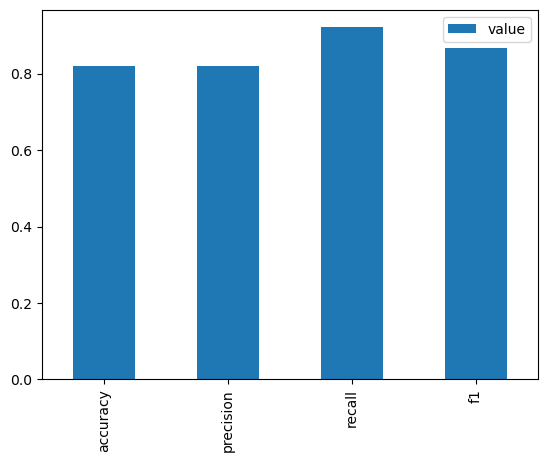

In [121]:
metrics.T.plot(kind='bar')

### feature importance

In [123]:
grid_log_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [125]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver='liblinear')

In [126]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [128]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [138]:
feature_dict=dict(zip(data.columns,clf.coef_[0]))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [143]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


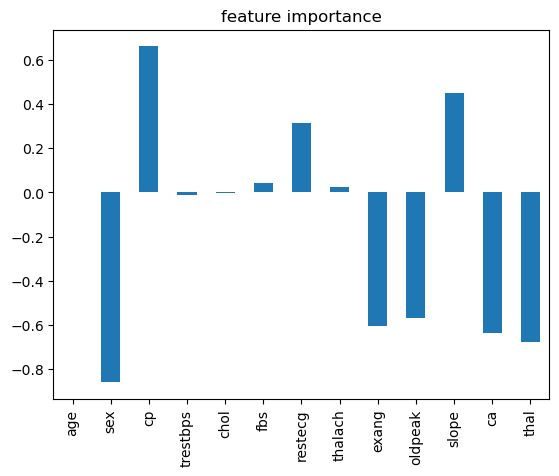

In [148]:

feature_df.T.plot(kind='bar',legend=False)
plt.title('feature importance');